

*   **!! Copy file colab ini ke drive masing-masing !!**
*   Jawab soal secara berurutan, pastikan cell kode dan output untuk setiap soal tepat berada dibawah bagian soal tersebut
*   Kerjakan dengan maksimal, manfaatkan tugas ini untuk latihan
*   Silakan menambahkan library lain kalau memang diperlukan


---

* Jika sudah selesai, share colab masing-masing dan atur menjadi "anyone with the link" sebagai "viewer".  Lalu paste link colab masing-masing pada [Form](https://forms.gle/dcYVXy9iAzjZQhfx5) yang sudah disediakan

* Jika ada pertanyaan, silakan tanyakan di [Sheet QNA](https://intip.in/QnaPma).  Pastikan pertanyaan yang akan kalian ajukan belum pernah ditanya sebelumnya






# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Import Dataset


*   gunakan link ini untuk mengimport dataset : https://raw.githubusercontent.com/bayuazra23/datasets/main/penguins.csv
*   Simpan dataset dalam variabel bernama "df"
*   Variabel terikat untuk dataset ini adalah species dari pinguin, dengan kolom lain sebagai variable bebas




In [ ]:
url = 'https://raw.githubusercontent.com/bayuazra23/datasets/main/penguins.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Label encoder untuk kolom kategorikal (run, sesuaikan kalau ada error saja)

In [ ]:
for col in df[['sex','island']]:
  df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df

# EDA

**General Rule** : Silahkan tambah business question lain yang bisa kalian formulasikan

## Tunjukan 5 data random dari dataset

In [ ]:
pinguin.sample(5)

## Tampilkan info, rangkuman analisis statistik (mean, std, dsb), serta jumlah nilai null untuk masing-masing kolom pada dataset

In [ ]:
#menampilkan info
pinguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#menampilkan rangkuman analisis statistik
pinguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
#menampilkan jumlah nilai null
pinguin.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
#menghilangkan data yang null
pinguin_not_null = pinguin.dropna()

In [ ]:
pinguin_not_null.isnull().sum()

## Berapa rata-rata berat badan pinguin untuk setiap jenis kelamin?

**hint** : karena kolom species sudah di encode, silakan import ulang dataset pada variable baru, misal "df_not_encoded"

In [ ]:
pinguin.groupby('sex')['body_mass_g'].mean()

sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

## Berapa rata-rata berat badan pinguin untuk masing-masing spesies?

In [ ]:
pinguin.groupby('species')['body_mass_g'].mean()

## Ada berapa jumlah data pinguin untuk masing-masing pulau?

In [ ]:
pinguin['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
pinguin.groupby('island').size()

## [Bonus] Business Question tambahan

In [ ]:
# [Tulis business kalian menggunakan komen, lalu tulis kode dicell yang sama]
# Mengetahui perbedaan analisis statistik antara laki-laki dan perempuan
pinguin.groupby('sex').describe()

# Visualisasi Data

**general rule** : anda akan diminta untuk membuat sebuah visualisasi untuk setiap jenis grafik yang sudah dipelajari.  Mengenai data yang digunakan untuk setiap grafik, lakukan analisis terhadap dataset, lalu tentukan kolom yang cocok untuk masing-masing jenis grafik. Sertakan reasoning terhadap grafik yang dibuat menggunakan komen, perhatikan contoh cell dibawah

## contoh

In [ ]:
#Grafik barplot untuk membandingkan jumlah pinguin dari setiap pulau
[kode]

In [ ]:
#Mengetahui jumlah pinguin setiap pulau
pinguin.island.value_counts()

<Axes: >

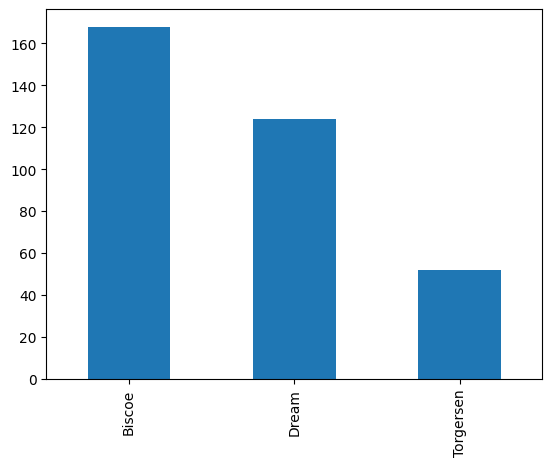

In [ ]:
#grafik versi 1
pinguin.island.value_counts().plot(kind = 'bar')

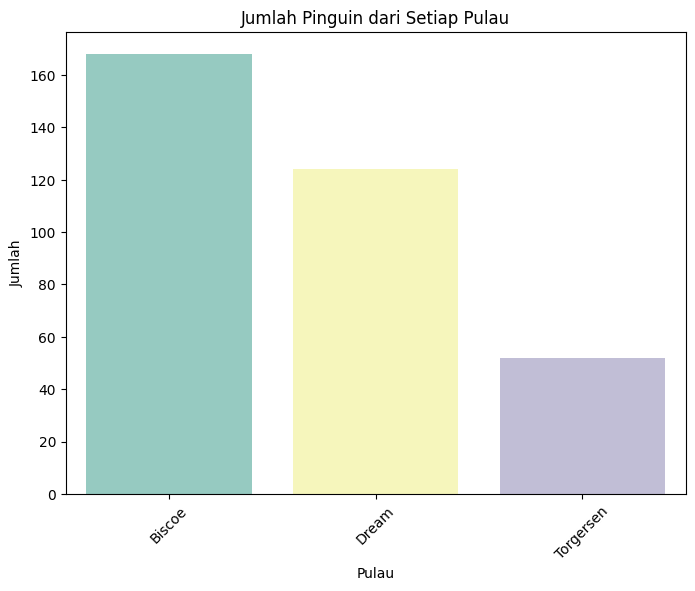

In [ ]:
#grafik versi 2
plt.figure(figsize=(8, 6))
sns.barplot(x=pinguin.island.value_counts().index, y=pinguin.island.value_counts().values, palette='Set3')
plt.title('Jumlah Pinguin dari Setiap Pulau')
plt.xlabel('Pulau')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

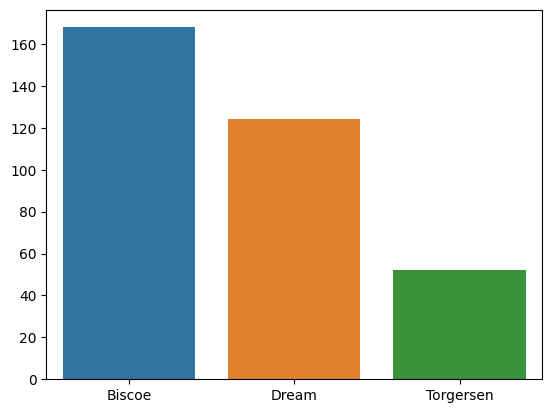

In [ ]:
sns.barplot(x=pinguin.island.value_counts().index, y=pinguin.island.value_counts().values)
plt.show()

## Barplot

In [ ]:
# [tulis reasoning untuk visualisasi disini]

In [ ]:
#barplot untuk mengetahui jumlah pinguin berdasarkan jumlah jenis kelamin
pinguin.sex.value_counts().plot(kind = 'bar')

In [ ]:
#barplot untuk mengetahui jumlah pinguin berdasarkan species
pinguin.species.value_counts().plot(kind = 'barh')

In [ ]:
sns.barplot(data=pinguin, x='island', y='body_mass_g', hue='sex')

## Scatterplot

In [ ]:
# scatterplot hubungan massa badan dan panjang flipper

<Axes: xlabel='Berat Badan (g)', ylabel='Panjang Flipper (mm)'>

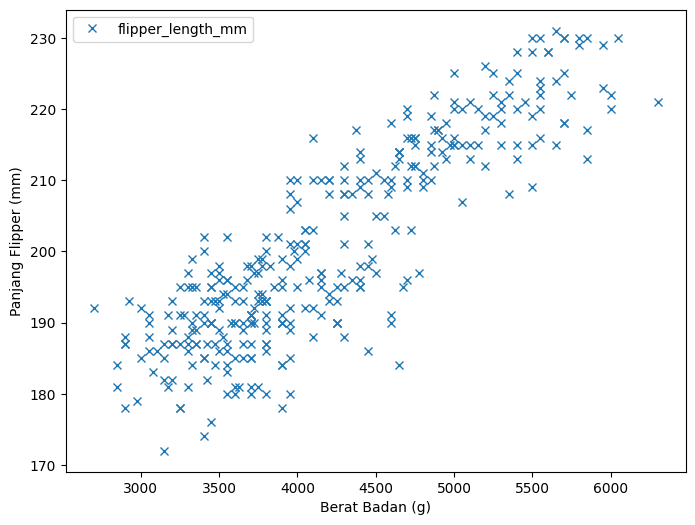

In [ ]:
#scatterplot perbandingan massa badan dan panjang flipper
pinguin.plot(x='body_mass_g', y='flipper_length_mm',style='x', figsize=(8,6), ylabel='Panjang Flipper (mm)', xlabel='Berat Badan (g)', legend=True)

In [ ]:
#Scatterplot untuk mengetahui apakah massa badan dan panjang flipper memengaruhi jenis species pinguin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pinguin, x='flipper_length_mm', y='body_mass_g', hue='species', palette='Set1')
plt.title('Scatterplot Panjang Flipper vs Berat Badan')
plt.xlabel('Panjang Flipper (mm)')
plt.ylabel('Berat Badan (g)')
plt.legend(title='Spesies', loc='upper left')
plt.show()

## Boxplot

In [ ]:
# [tulis reasoning untuk visualisasi disini]

In [ ]:
#boxplot distribusi data jenis kelamin pinguin berdasarkan berat badan

In [ ]:
#grafik latihan
pinguin.boxplot('body_mass_g')

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=pinguin, x='sex', y='body_mass_g')
plt.title('Boxplot Berat Badan Pinguin Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Berat Badan (g)')
plt.show()

## Histogram

In [ ]:
# [tulis reasoning untuk visualisasi disini]

In [ ]:
#histogram distribusi massa berat badan dari keseluruhan pinguin
pinguin.body_mass_g.hist(figsize=(8,4), edgecolor='black')

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(pinguin.body_mass_g, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Distribusi Berat Badan Pinguin')
plt.xlabel('Berat Badan (g)')
plt.ylabel('Frekuensi')
plt.show()

## Correlation Heatmap

In [ ]:
# [tulis reasoning untuk visualisasi disini]

In [ ]:
#grafik correlation heatmap yang menunjukan nilai korelasi antar kolom dari dataset yang ada

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pinguin.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

In [ ]:
corrmat = pinguin.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, square=True, annot=True)

# Data Mining

**General Rule** :


*   Buatlah model menggunakan masing-masing algoritma
*   Lakukan spliting data dengan rasio train:test sebesar 70:30
*   Bandingkan nilai akurasi untuk splitting data tersebut dengan split data menggunakan cross validation 10 fold
*   Tampilkan juga classification report untuk masing-masing model


## Naive Bayes

In [ ]:
data_nb = pinguin_not_null

In [ ]:
data_nb

In [ ]:
#memisahkan nilai x dan y
X = data_nb.iloc[:, [2,3,4,5]].values
y = data_nb.iloc[:, 0].values

In [ ]:
X

In [ ]:
#split data training-testing = 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0 )

In [ ]:
#tanpa cross validation
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_nb=classifier.predict(X_test)
acc_nb=accuracy_score(y_test, y_pred_nb)
print(acc_nb)

In [ ]:
#dengan cross validation
cross_val_score(classifier, X, y, cv=10).mean()

In [ ]:
#hasil classification report
print(classification_report(y_test, y_pred_nb))

## KNN

*   coba nilai K sebesar 3, 5, 7, 9. Buatlah model dengan nilai K terbaik






In [ ]:
data_knn = pinguin_not_null
X = data_knn.iloc[:, [2,3,4,5]].values
y = data_knn.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0 )

In [ ]:
#tanpa cross validation
k_values = [3, 5, 7, 9]
for k in k_values:
  print("k = ", k)
  classifier_knn=KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
  classifier_knn.fit(X_train,y_train)
  y_pred_knn=classifier_knn.predict(X_test)
  acc_knn=accuracy_score(y_test,y_pred_knn)
  print("Akurasi : ", acc_knn)




In [ ]:
#dengan cross validation
for k in k_values:
  print("k = ", k)
  classifier_knn=KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
  classifier_knn.fit(X_train,y_train)

  y_pred_knn=classifier.predict(X_test)
  acc_cross_knn = cross_val_score(classifier_knn, X, y, cv=10).mean()
  print("Akurasi : ", acc_cross_knn)

In [ ]:
for k in [3,5,7,9]:
  print("K = ", k)
  print("hasil report :", classification_report(y_test, y_pred_knn), '\n')

## SVM

In [ ]:
data_svm = pinguin_not_null
X = data_svm.iloc[:,[2,3,4,5]].values
y = data_svm.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 0)
classifier_svc = SVC(kernel = "rbf", random_state = 0)
classifier_svc.fit(X_train, y_train)
y_pred_svc = classifier_svc.predict(X_test)
#tanpa cross validation
acc_svc=accuracy_score(y_test, y_pred_svc)
print(acc_svc)

In [ ]:
#dengan cross validation
cross_val_score(classifier_svc, X, y, cv=10).mean()

In [ ]:
#hasil classification report
print(classification_report(y_test, y_pred_svc))

## Logistic Regression

In [ ]:
data_lr = pinguin_not_null
X = data_lr.iloc[:,[2,3,4,5]].values
y = data_lr.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 0)
classifier_lr = LogisticRegression(max_iter=10000)
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)
#tanpa cross validation
acc_lr=accuracy_score(y_test, y_pred_lr)
print(acc_lr)

In [ ]:
#dengan cross validation
cross_val_score(classifier_lr, X, y, cv=10).mean()

In [ ]:
#hasil classification report
print(classification_report(y_test, y_pred_lr))

## Decision Tree

In [ ]:
data_dt = pinguin_not_null
X = data_dt.iloc[:,[2,3,4,5]].values
y = data_dt.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 0)
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)
#tanpa cross validation
acc_dt=accuracy_score(y_test, y_pred_dt)
print(acc_dt)

In [ ]:
cv_scores_dt = cross_val_score(classifier_dt, X, y, cv=10)
np.mean(cv_scores_dt)

In [ ]:
cross_val_score(classifier_dt, X, y, cv=10).mean()

In [ ]:
#hasil classification report
print(classification_report(y_test, y_pred_dt))



--------------



# Selesai 🐈